## Scraping the data for 2018

Japan's Fire and Disaster Management Agency publishes the information of natural disasters in PDFs.

http://www.fdma.go.jp/bn/2018/

In [1]:
import pandas as pd

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait

In [2]:
driver = webdriver.Chrome()

In [3]:
driver.get('http://www.fdma.go.jp/bn/2018/')

In [4]:
disaster_list = []
events = driver.find_element_by_class_name('link_list_cms').find_elements_by_tag_name('li')
for event in events:
    event_dic = {}
    event_dic['Event'] = event.find_element_by_tag_name('a').text
    event_dic['URL'] = event.find_element_by_tag_name('a').get_attribute('href')
    disaster_list.append(event_dic)

In [5]:
df_event = pd.DataFrame(disaster_list)
df_event.head()

,Event,URL
0,平成30年07月20日 広島県広島市における熱中症事案について（最終報 H30.7.20更新）,http://www.fdma.go.jp/bn/2018/detail/1062.html
1,平成30年07月18日 宮城県名取市における熱中症事案について（第3報 H30.7.18更新）,http://www.fdma.go.jp/bn/2018/detail/1061.html
2,平成30年07月13日 平成30年７月豪雨非常災害対策本部会議（消防庁資料 H30.7.19更新）,http://www.fdma.go.jp/bn/2018/detail/1060.html
3,平成30年07月11日 平成30年７月豪雨による被害に対する消防機関等の活動写真（愛媛県）,http://www.fdma.go.jp/bn/2018/detail/1059.html
4,平成30年07月11日 平成30年７月豪雨による被害に対する消防機関等の活動写真（岡山県）,http://www.fdma.go.jp/bn/2018/detail/1058.html


In [6]:
df_event['Date'] = df_event['Event'].str.extract('年([\w\d]+)')
df_event['Date'] = df_event['Date'].str.replace('月', '')
df_event['Date'] = df_event['Date'].str.replace('日', '')
df_event['Date'] = '2018' + df_event['Date']
df_event['Date'] = pd.to_datetime(df_event['Date'], format='%Y%m%d')
df_event['Event'] = df_event['Event'].str.extract('　(.*)')
df_event['ID'] = df_event['URL'].str.extract('([\d]{4}).html')
df_event.head()

,Event,URL,Date,ID
0,広島県広島市における熱中症事案について（最終報 H30.7.20更新）,http://www.fdma.go.jp/bn/2018/detail/1062.html,2018-07-20,1062
1,宮城県名取市における熱中症事案について（第3報 H30.7.18更新）,http://www.fdma.go.jp/bn/2018/detail/1061.html,2018-07-18,1061
2,平成30年７月豪雨非常災害対策本部会議（消防庁資料 H30.7.19更新）,http://www.fdma.go.jp/bn/2018/detail/1060.html,2018-07-13,1060
3,平成30年７月豪雨による被害に対する消防機関等の活動写真（愛媛県）,http://www.fdma.go.jp/bn/2018/detail/1059.html,2018-07-11,1059
4,平成30年７月豪雨による被害に対する消防機関等の活動写真（岡山県）,http://www.fdma.go.jp/bn/2018/detail/1058.html,2018-07-11,1058


In [7]:
df_disasters = df_event[df_event['Event'].str.contains('雨|雪|地震|火山|土砂')]
df_disasters = df_disasters[~df_disasters['Event'].str.contains('写真')]
df_disasters = df_disasters[~df_disasters['Event'].str.contains('会議')]
df_disasters = df_disasters[~df_disasters['Event'].str.contains('国際')]
df_disasters['Event'] = df_disasters['Event'].str.replace('(', '（')
df_disasters['Event'] = df_disasters['Event'].str.replace(')', '）')
df_disasters['Event'] = df_disasters['Event'].str.extract('(.*)（.*）$')
df_disasters = df_disasters.reset_index()
df_disasters = df_disasters.drop(columns=['index'])
df_disasters.head()

,Event,URL,Date,ID
0,千葉県東方沖を震源とする地震,http://www.fdma.go.jp/bn/2018/detail/1054.html,2018-07-07,1054
1,平成30年７月豪雨による被害状況及び消防機関等の対応状況,http://www.fdma.go.jp/bn/2018/detail/1052.html,2018-07-03,1052
2,大阪府北部を震源とする地震による被害及び消防機関等の対応状況,http://www.fdma.go.jp/bn/2018/detail/1050.html,2018-06-18,1050
3,群馬県南部を震源とする地震,http://www.fdma.go.jp/bn/2018/detail/1049.html,2018-06-17,1049
4,長野県北部を震源とする地震,http://www.fdma.go.jp/bn/2018/detail/1047.html,2018-05-25,1047


In [8]:
df_disasters['Disaster'] = df_disasters['Event'].str.replace('.*雨.*', 'Flood')
df_disasters['Disaster'] = df_disasters['Disaster'].str.replace('.*雪.*', 'Snow')
df_disasters['Disaster'] = df_disasters['Disaster'].str.replace('.*地震.*', 'Earthquake')
df_disasters['Disaster'] = df_disasters['Disaster'].str.replace('.*火山.*', 'Volcano')
df_disasters['Disaster'] = df_disasters['Disaster'].str.replace('.*土砂.*', 'Others')
df_disasters.head()

,Event,URL,Date,ID,Disaster
0,千葉県東方沖を震源とする地震,http://www.fdma.go.jp/bn/2018/detail/1054.html,2018-07-07,1054,Earthquake
1,平成30年７月豪雨による被害状況及び消防機関等の対応状況,http://www.fdma.go.jp/bn/2018/detail/1052.html,2018-07-03,1052,Flood
2,大阪府北部を震源とする地震による被害及び消防機関等の対応状況,http://www.fdma.go.jp/bn/2018/detail/1050.html,2018-06-18,1050,Earthquake
3,群馬県南部を震源とする地震,http://www.fdma.go.jp/bn/2018/detail/1049.html,2018-06-17,1049,Earthquake
4,長野県北部を震源とする地震,http://www.fdma.go.jp/bn/2018/detail/1047.html,2018-05-25,1047,Earthquake


In [9]:
pdf_list = []
for url in df_disasters['URL']:
    driver.get(url)
    pdf = driver.find_element_by_class_name('pdf').find_element_by_tag_name('a').get_attribute('href')
    pdf_list.append(pdf)

In [10]:
df_disasters['PDF'] = pdf_list
df_disasters[['Event', 'Date', 'PDF', 'ID']]

,Event,Date,PDF,ID
0,千葉県東方沖を震源とする地震,2018-07-07,http://www.fdma.go.jp/bn/1bb99d4777f0f694cb028...,1054
1,平成30年７月豪雨による被害状況及び消防機関等の対応状況,2018-07-03,http://www.fdma.go.jp/bn/0c397ca46f241509610be...,1052
2,大阪府北部を震源とする地震による被害及び消防機関等の対応状況,2018-06-18,http://www.fdma.go.jp/bn/6463f3b06e101370929aa...,1050
3,群馬県南部を震源とする地震,2018-06-17,http://www.fdma.go.jp/bn/ee834d7a6fcb77a06256a...,1049
4,長野県北部を震源とする地震,2018-05-25,http://www.fdma.go.jp/bn/82a514aa4c3d491d6213d...,1047
5,長野県北部を震源とする地震,2018-05-12,http://www.fdma.go.jp/bn/5f12764e0eefb82a98c8e...,1046
6,霧島山（えびの高原（硫黄山）周辺）の火山活動による被害及び消防機関等の対応状況,2018-04-19,http://www.fdma.go.jp/bn/4cf466cef3efc0050da18...,1044
7,根室半島南東沖を震源とする地震,2018-04-14,http://www.fdma.go.jp/bn/2c8f4233ea3787005facb...,1042
8,今冬の雪による被害状況等,2018-04-13,http://www.fdma.go.jp/bn/e347416dc14c30a0a2df0...,1029
9,大分県中津市において発生した土砂災害による被害,2018-04-11,http://www.fdma.go.jp/bn/d62532d7aa49a52b62668...,1041


In [11]:
import requests
import pdftotext
import tabula
import re

In [12]:
num = -1
for URL in df_disasters['PDF']:
    num = num + 1
    url = URL
    response = requests.get(url)
    with open('./PDF/'+df_disasters['ID'][num]+'.pdf', 'wb') as f:
        f.write(response.content)

In [13]:
def pdf_to_string(file):
    pdf_string = ""
    with open(file, "rb") as f:
        pdf = pdftotext.PDF(f)
        for page in pdf:
            pdf_string += page
    return pdf_string

In [14]:
PDF_text = []
for ID in df_disasters['ID']:
    PDF_dic = {}
    PDF_dic['ID'] = ID
    PDF_dic['Text'] = pdf_to_string('./PDF/'+ID+'.pdf').split('\n')
    PDF_text.append(PDF_dic)

In [15]:
PDF = pd.DataFrame(PDF_text)

In [16]:
PDF

,ID,Text
0,1054,"[ 千葉県東方沖を震源とする地震による被害及び, ..."
1,1052,"[ 平成３０年７月豪雨による被害状況及び消防機関等, ..."
2,1050,"[ 大阪府北部を震源とする地震による被害及び, ..."
3,1049,"[ 群馬県南部を震源とする地震による被害及び, ..."
4,1047,"[ 長野県北部を震源とする地震による被害及び, ..."
5,1046,"[ 長野県北部を震源とする地震による被害及び, ..."
6,1044,"[ 霧島山（えびの高原（硫黄山）周辺）の火山活動による被害及び, ..."
7,1042,"[ 根室半島南東沖を震源とする地震による被害及び, ..."
8,1029,"[ 今冬の雪による被害状況等（～平成30年3月31日）, ..."
9,1041,"[ 大分県中津市において発生した土砂災害による被害及び, ..."


In [17]:
damages = []

num1 = -1
for text in PDF['Text']:
    num1 = num1 + 1
    num2 = -1
    for line in text:
        num2 = num2 + 1
        damage_dic = {}
        try:
            damage_dic['ID'] = PDF['ID'][num1]
            damage_dic['Line'] = num2
            damage_dic['Damage'] = re.findall(r'.*人.*的.*', line)[0]
            damages.append(damage_dic)
        except:
            pass

In [18]:
df_damages = pd.DataFrame(damages)
df_damages

,Damage,ID,Line
0,２ 人的・建物被害等の状況,1054,14
1,人的・建物被害,1052,11
2,人 的 被 害 ...,1052,12
3,(2) 人的・建物被害,1050,22
4,人 的 被 害 住 ...,1050,23
5,(1) 人的被害,1049,15
6,人的・建物被害等,1047,15
7,人的・建物被害等,1046,15
8,（１）人的被害,1044,14
9,人的・建物被害等,1042,15


In [19]:
PDF['Text'][0][14:16]

['２   人的・建物被害等の状況', '    被害情報なし']

In [20]:
PDF['Text'][1][11:52]

['   人的・建物被害',
 '                 人   的  被   害                     住     家    被   害             非住家被害',
 '               行 方          負 傷 者                        一部     床上     床下     公共',
 '   都道府県名 死者                                全壊     半壊                               その他',
 '               不明者    重傷     軽傷    程度不明                  破損     浸水     浸水     建物',
 '          人     人      人      人     人       棟     棟       棟      棟      棟      棟    棟',
 '    北海道                                                       1      7    121          3',
 '    秋田県                                                       1',
 '    福島県                                                       9',
 '   神奈川県                                                              1      1',
 '    富山県                                                                     2          1',
 '    石川県                                                                     9',
 '    福井県                                                  

In [21]:
PDF['Text'][2][18:36]

['２   被害の状況',
 '  (1) 火災の状況',
 '    【大阪府】 大阪市 ３件',
 '    【兵庫県】 尼崎市 ４件',
 '  (2) 人的・建物被害',
 '                人  的 被  害               住     家    被     害       非住家被害',
 '                行 方     負 傷 者                  一部       床上   床下 公共',
 '都道府県名     死者                      全壊    半壊                            その他',
 '                不明者   重傷    軽傷                 破損       浸水   浸水 建物',
 '           人      人    人     人     棟    棟       棟        棟    棟  棟     棟',
 '  三重県                     1     1',
 '  滋賀県                           3',
 '  京都府                     1    21               2,434',
 '  大阪府         4           9   351    10   181  30,524             675    11',
 '  兵庫県                     4    38                   4',
 '  奈良県                           4                  27',
 '  徳島県                           1',
 '  合   計       4          15   419    10   181  32,989             675    11']

In [22]:
PDF['Text'][3][14:23]

['２   被害の状況',
 '  (1) 人的被害',
 '    【群馬県】',
 '      なし',
 '  (2) 住家被害',
 '    【群馬県】',
 '      ４棟',
 '      ・渋川市２棟（一部破損）',
 '      ・前橋市２棟（一部破損）']

In [23]:
PDF['Text'][4][14:17]

['２   被害の状況', '    人的・建物被害等', '    被害情報なし']

In [24]:
PDF['Text'][5][14:17]

['２   被害の状況', '    人的・建物被害等', '    被害情報なし']

In [25]:
PDF['Text'][6][13:18]

['２  被害の状況', '  （１）人的被害', '     被害情報なし', '  （２）住家被害', '     被害情報なし']

In [26]:
PDF['Text'][7][14:17]

['２   被害の状況', '    人的・建物被害等', '    被害情報なし']

In [27]:
PDF['Text'][8][4:62]

['１ 主な被害及び災害対策本部の設置状況（概数）',
 '             人的被害                 住家被害             非住家被害       災対本部',
 '   都道  死 者',
 '            行方',
 '               重 傷  軽 傷   全 壊 半 壊',
 '                                   一部    床上   床下   公共',
 '                                                         その他',
 '  府県名       不明                     破損    浸水   浸水   施設         都道     市区',
 '                                                              府県     町村',
 '        人   人   人    人     棟   棟   棟     棟    棟     棟     棟',
 '  北海道    22     130   194    2   6   41   11   19    24    69           12',
 '  青 森     4      21    37                                   1',
 '  岩 手     4      22    35             2               1     3',
 '  宮 城     2       2     4                                                1',
 '  秋 田     7     104    61    1        7                    71            3',
 '  山 形    16      90    63    1        9     1    5         28     1',
 '  福 島     5      17    31        2    4       

In [28]:
PDF['Text'][9][12:17]

['４   被害の状況', '  (1) 人的被害', '      死者６名', '  (2) 住家被害', '      全壊４棟']

In [29]:
df9 = pd.DataFrame([{'都道府県名': '合 計', '死者': '6'}])
df9

,死者,都道府県名
0,6,合 計


In [30]:
PDF['Text'][10][15:29]

['２   被害の状況',
 '  (1) 人的被害',
 '    【島根県】',
 '      重傷２名（大田市）',
 '      軽傷７名（大田市２名、出雲市３名、雲南市１名、奥出雲町１名）',
 '  (2) 住家被害',
 '    【島根県】',
 '      ４３２棟',
 '      大田市４２８棟（全壊１３棟、半壊４４棟、一部破損３７１棟）',
 '      川本町     １棟（一部破損）',
 '      美郷町    ３棟（一部破損）',
 '  (3) 非住家被害',
 '    【島根県】',
 '      大田市 ３１棟（全壊１４棟、半壊１７棟）']

In [31]:
df10 = pd.DataFrame([{'都道府県名': '合 計', '重傷': '2', '軽傷': '7'}])
df10

,軽傷,都道府県名,重傷
0,7,合 計,2


In [32]:
PDF['Text'][11][14:19]

['２   被害の状況', '  (1) 人的被害', '      被害情報なし', '  (2) 住家被害', '      被害情報なし']

In [33]:
PDF['Text'][12][17:22]

['２   被害の状況', '  （１）人的被害', '      被害情報なし', '  （２）住家被害', '      被害情報なし']

In [34]:
PDF['Text'][13][15:31]

['２   被害状況',
 '              人  的 被 害               住    家   被   害          非住家被害',
 '              行 方     負 傷 者                一部    床上   床下    公共',
 ' 都道府県名  死者                      全壊   半壊                         その他',
 '              不明者   重傷    軽傷               破損    浸水   浸水    建物',
 '         人      人    人     人     棟    棟     棟     棟    棟     棟   棟',
 '  岩手県                   1     3',
 '  秋田県                   9     4                           1         3',
 '  山形県       1          18    16                     1               3',
 '  福島県       1           3     4                           1',
 '  新潟県       9          41    58    1           5                   19',
 '  富山県       2           4    16',
 '  石川県                   7    41    1    4      5          1         3',
 '  福井県       9          19    76         1     21          7        52',
 '  熊本県                                          1',
 '  合  計     22         102   218    2    5     32    1    10        80']

In [35]:
PDF['Text'][14][12:22]

['２  被害の状況',
 '  ⑴ 概要',
 '    草津国際スキー場において、噴石による被害発生及びロープウェーの停止に伴い８１名が取り残さ',
 '   れたもの（２３日１７時１０分下山完了）',
 '  ⑵ 人的被害',
 '    死者１名、重傷３名、軽傷８名',
 '   《死者の状況》',
 '   ・ゲレンデで訓練中の４０歳代の男性自衛隊員が噴石の直撃を受け、病院搬送後に死亡確認',
 '  ⑶ 住家被害',
 '    被害情報なし']

In [36]:
df14 = pd.DataFrame([{'都道府県名': '合 計', '死者': '1', '重傷': '3', '軽傷': '8'}])
df14

,死者,軽傷,都道府県名,重傷
0,1,8,合 計,3


In [37]:
for i in [1, 2, 8, 13, 15]:
    df = tabula.read_pdf('./PDF/'+PDF['ID'][i]+'.pdf', lattice=True)
    df.to_csv('./CSV/df'+str(i)+'.csv', index=False)

In [38]:
df1 = pd.read_csv('./CSV/df1_edited.csv')
df1 = df1.dropna(subset=['都道府県名'])
df1.tail(1)

,都道府県名,死者,行方不明者,重傷,軽傷,程度不明,全壊,半壊,一部破損,床上浸水,床下浸水,公共建物,その他
34,合 計,219,10,58,303,3,"2,873",588,984,"15,159","19,463",6,43


In [39]:
df2 = pd.read_csv('./CSV/df2_edited.csv')
df2.tail(1)

,都道府県名,死者,行方不明者,重傷,軽傷,全壊,半壊,一部破損,床上浸水,床下浸水,公共建物,その他
8,合 計,4,NaN,15,419,9,87,"27,096",NaN,NaN,675,11


In [40]:
df8 = pd.read_csv('./CSV/df8_edited.csv')
df8.tail(1)

,都道府県名,死者,行方不明,重傷,軽傷,全壊,半壊,一部破損,床上浸水,床下浸水,公共施設,その他,都道府県,市区町村
48,合 計,116,NaN,624,915,9,18,326,13,40,32,343,4.0,46.0


In [41]:
df13 = pd.read_csv('./CSV/df13_edited.csv')
df13.tail(1)

,都道府県名,死者,行方不明者,重傷,軽傷,全壊,半壊,一部破損,床上浸水,床下浸水,公共建物,その他
10,合 計,22,NaN,102,218,2,5,32,1,10,NaN,80


In [42]:
df15 = pd.read_csv('./CSV/df15_edited.csv')
df15.tail(1)

,都道府県名,死者,行 方不明者,重傷,軽傷,全壊,半壊,一部破損,床上浸水,床下浸水,公共建物,その他
15,合 計,5,NaN,19,957,NaN,NaN,4,NaN,NaN,NaN,NaN


In [43]:
death = [0, 229, 4, 0, 0, 0, 0, 0, 116, 6, 0, 0, 0, 22, 1, 5]
df_disasters['Death Toll'] = death
df_disasters['Death Toll'] = df_disasters['Death Toll'].astype(int)
df_disasters[['Event', 'Date', 'Disaster', 'Death Toll']].head()

,Event,Date,Disaster,Death Toll
0,千葉県東方沖を震源とする地震,2018-07-07,Earthquake,0
1,平成30年７月豪雨による被害状況及び消防機関等の対応状況,2018-07-03,Flood,229
2,大阪府北部を震源とする地震による被害及び消防機関等の対応状況,2018-06-18,Earthquake,4
3,群馬県南部を震源とする地震,2018-06-17,Earthquake,0
4,長野県北部を震源とする地震,2018-05-25,Earthquake,0


In [44]:
summary = df_disasters.groupby(by='Disaster')['Death Toll'].sum().reset_index()
summary

,Disaster,Death Toll
0,Earthquake,4
1,Flood,229
2,Others,6
3,Snow,143
4,Volcano,1


In [45]:
total = summary['Death Toll'].sum()
new_summary = pd.DataFrame([{'Disaster': 'Total', 'Death Toll': total}, {'Disaster': 'Year', 'Death Toll': 2018}, {'Disaster': 'Year_JP', 'Death Toll': 30} ])
summary = summary.append(new_summary, sort=True)
summary = summary.set_index('Disaster').T
summary

Disaster,Earthquake,Flood,Others,Snow,Volcano,Total,Year,Year_JP
Death Toll,4,229,6,143,1,383,2018,30


In [46]:
death_toll = pd.read_csv('death_toll.csv')
death_toll = death_toll.append(summary, sort=True)
death_toll.to_csv('death_toll_updated.csv', index=False)
death_toll.head()

,Earthquake,Flood,Others,Snow,Total,Volcano,Year,Year_JP
0,234,183,11,9,438,1,1993,5
1,3,8,7,21,39,0,1994,6
2,6437,19,8,14,6482,4,1995,7
3,0,21,35,28,84,0,1996,8
4,0,51,4,16,71,0,1997,9


In [47]:
import matplotlib.pyplot as plt
from cycler import cycler

%matplotlib inline

In [48]:
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'axes.grid': True,
    'axes.prop_cycle': cycler('color', ['#01579B', '#B71C1C', '#827717', '#1B5E20', '#F57F17', '#4A148C', '#1B5E20']),
    'axes.edgecolor': '#ffffff',
    'xtick.major.size': 0,
    'xtick.minor.size': 0,
    'ytick.major.size': 0,
    'ytick.minor.size': 0,
    'legend.edgecolor': '#ffffff',
    'ps.fonttype': 42,
})

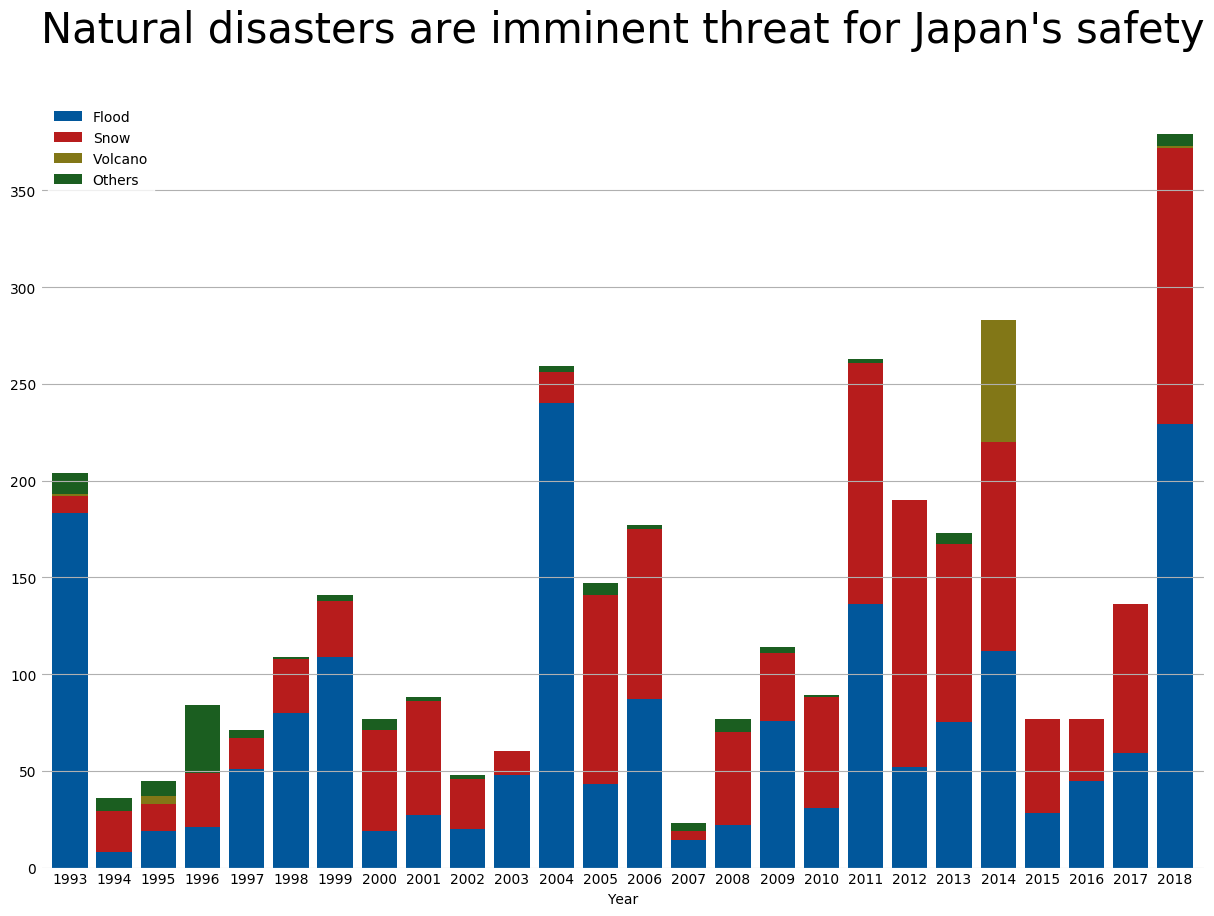

In [49]:
ax = death_toll[['Flood', 'Snow', 'Volcano', 'Others', 'Year']].plot(x='Year', kind='bar', figsize=(15,10), width=0.8, rot=0, stacked=True)
ax.set_title('Natural disasters are imminent threat for Japan\'s safety', pad=40)
ax.title.set_fontsize(30)
ax.grid(False, axis='x')
plt.savefig("graph-disasters.pdf")
plt.show()

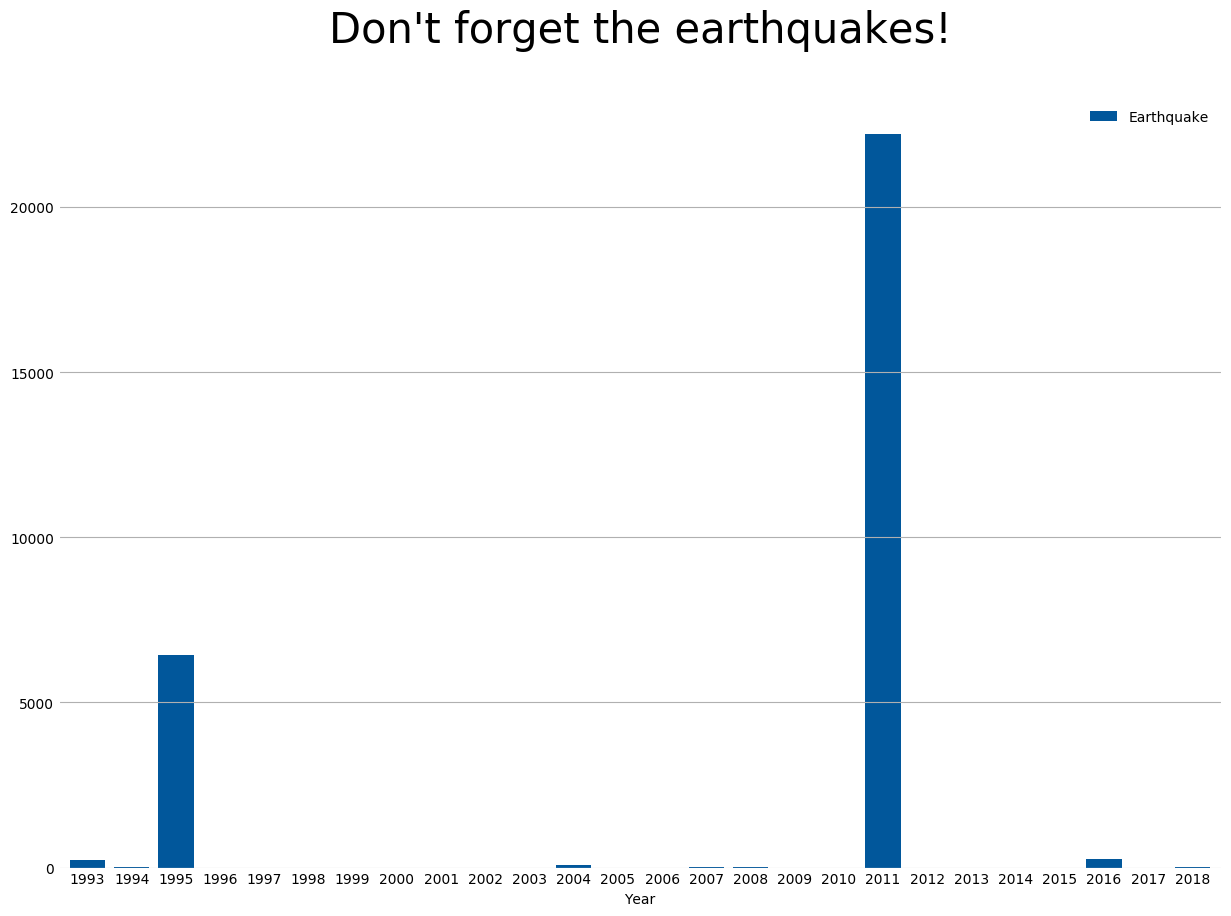

In [50]:
ax = death_toll[['Earthquake', 'Year']].plot(x='Year', kind='bar', figsize=(15,10), width=0.8, rot=0)
ax.set_title('Don\'t forget the earthquakes!', pad=40)
ax.title.set_fontsize(30)
ax.grid(False, axis='x')
plt.savefig("graph-earthquakes.pdf")
plt.show()